In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['font.family']="AppleGothic"
matplotlib.rcParams['axes.unicode_minus']=False

In [3]:
titanic=sns.load_dataset('titanic') #kaggle
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# 1.deck컴럼을 삭제하고 나이(age)의 nan데이터를 나이평균값으로채우시요
# 2.생존자와사망자에대한갯수를구하시요
# 3.등급별(pclass)생존평균을구하시요
# 4.SibSp(가족또는친구탑승)의생존평균을구하시요
# 5.혼자탑승(alone)한인원의생존평균을구하시요
# 6.성별생존평균을구하시요
# 7.등급별티켓비용(fare)의평균을 차트로그리시요
# 8.나이분류컬럼을추가하시요
# 1~15(미성년자),15~25(청년),25~35(중년),
# 35~60(장년),60~(노년)으로표시하시요.
# 9.나이분류를파이차트로표시하시요
# 10.생존율이가장높은나이분류를구하시요
# 11.성별,나이분류별,등급(pclass)를멀티인덱스로,
# 평균생존을값으로표시하시요

In [4]:
# 1.deck컴럼을 삭제하고 나이(age)의 nan데이터를 나이평균값으로채우시요
# titianic.drop(columns="deck", inplace=True)
del titanic['deck']
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [5]:
# null 데이터 확인
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
meanAge = titanic["age"].mean();
titanic["age"] = titanic["age"].fillna(meanAge)

In [8]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [10]:
# 2.생존자와사망자에대한갯수를구하시요
titanic["alive"].value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

In [8]:
# 3.등급별(pclass)생존평균을구하시요
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [12]:
d=titanic.groupby('pclass')
print(d)

In [13]:
# titanic.sum()[['survived']]
# sum()이 모든 컬럼(survived, sex, class, embarked, …)에 대해 한 번씩 돌아가면서 적용되는데,
# class라는 category dtype 컬럼이 있어서 합계를 못 내고 에러를 출력한다.
# 따라서 원하는 컬럼만 집계 대상으로 명시해야 한다.
d[['survived']].mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [22]:
# 4.SibSp(가족또는친구탑승)의생존평균을구하시요
d2=titanic.groupby('sibsp')
print(d2)
d2[['survived']].mean()

,survived
sibsp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [20]:
# 5.혼자탑승(alone)한인원의생존평균을구하시요
titanic[titanic['alone'] == True][['survived']].mean()

survived    0.303538
dtype: float64

In [24]:
# [풀이]
# 4.SibSp(가족또는친구탑승)의생존평균을구하시요 -> alone = Fales
# 5.혼자탑승(alone)한인원의생존평균을구하시요 -> alone = True
titanic.groupby('alone')[['survived']].mean()

,survived
alone,
False,0.505650
True,0.303538


In [13]:
# 6.성별생존평균을구하시요
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


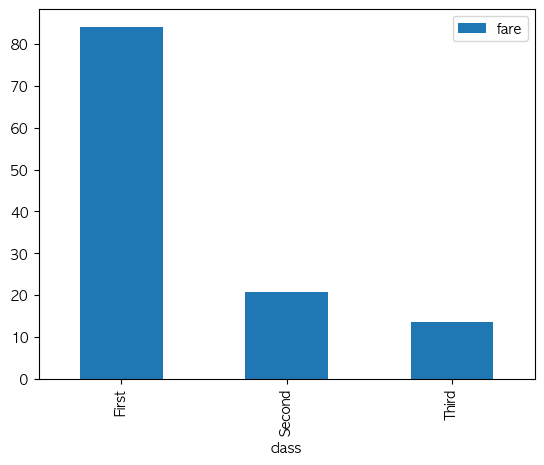

In [14]:
# 7.등급별티켓비용(fare)의평균을 차트로그리시요
titanic.groupby('class', observed=True)[['fare']].mean().plot(kind="bar")
plt.show()

In [38]:
# 8.나이분류컬럼을추가하시요
# 1~15(미성년자),15~25(청년),25~35(중년),
# 35~60(장년),60~(노년)으로표시하시요.
def calcAge(x):
    if x <= 15 and x > 0:
        return "미성년자"
    elif x <= 25 and x >15:
        return "청년"
    elif x <= 35 and x >25:
        return "중년"
    elif x <= 60 and x >35:
        return "장년"
    else:
        return "노년"

titanic['나이분류']=titanic['age'].apply(calcAge)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,나이분류
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,청년
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,장년
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,중년
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,중년
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,중년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,중년
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,청년
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,중년
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,중년


In [31]:
# [풀이]
ageMx = int(titanic['age'].max())
ageMx

80

In [33]:
titanic['나이분류']= pd.cut(titanic['age'],[0,15,25,35,60,ageMx], labels=['미성년자','청년', '중년', '장년', '노년'])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,나이분류
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,청년
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,장년
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,중년
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,중년
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,중년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,중년
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,청년
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,중년
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,중년


In [39]:
# 9.나이분류를파이차트로표시하시요
age_counts = titanic['나이분류'].value_counts()
age_counts

나이분류
중년      373
청년      218
장년      195
미성년자     83
노년       22
Name: count, dtype: int64

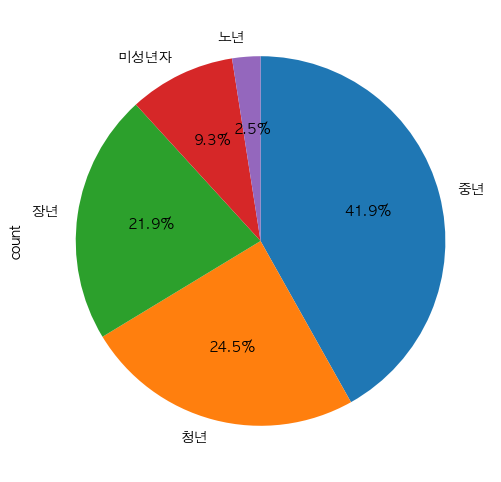

In [40]:
age_counts.plot.pie(
    autopct="%.1f%%",    # 퍼센트 표시
    startangle=90,       # 시작 각도
    counterclock=False,  # 시계방향
    figsize=(6, 6)       # 그래프 크기
)
plt.show()

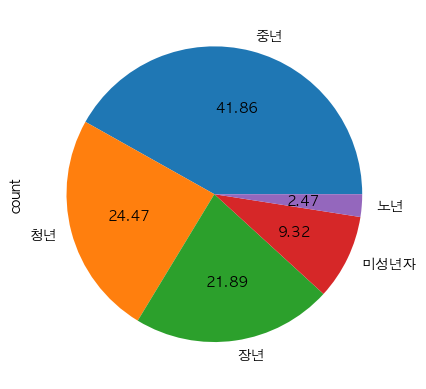

In [42]:
# [풀이]
age_counts.plot(kind='pie', autopct='%.2f')
plt.show()

In [50]:
# 10.생존율이가장높은나이분류를구하시요
df1 = titanic.groupby('나이분류')[['survived']].mean()
df1

,survived
나이분류,
노년,0.227273
미성년자,0.590361
장년,0.400000
중년,0.361930
청년,0.344037


In [51]:
# 11.성별,나이분류별,등급(pclass)를멀티인덱스로,
# 평균생존을값으로표시하시요
titanic.groupby(['sex', '나이분류', 'pclass'])[['survived']].mean()

survived
sex    나이분류 pclass          
female 노년   1       1.000000
            3       1.000000
       미성년자 1       0.666667
            2       1.000000
            3       0.533333
       장년   1       0.972222
            2       0.850000
            3       0.142857
       중년   1       1.000000
            2       0.925926
            3       0.562500
       청년   1       0.960000
            2       0.947368
            3       0.485714
male   노년   1       0.083333
            2       0.333333
            3       0.000000
       미성년자 1       1.000000
            2       1.000000
            3       0.321429
       장년   1       0.370370
            2       0.037037
            3       0.068182
       중년   1       0.404762
            2       0.119048
            3       0.141176
       청년   1       0.363636
            2       0.037037
            3       0.108911